# 📚 Exercise Session - Week 3: Understanding Recurrent Neural Networks
**Main Topics**: Backpropagation, vanishing gradients, LSTMs, Seq2seq Translation, S2S + Attention


 1. [**TASK A:** RNN for Sentiment Analysis](#task-a-rnn-for-sentiment-analysis)
- Train a recurrent neural network model using PyTorch
- Use it to classify the same sentiment analysis dataset as before

2. [**TASK B:** Machine Translation with Attention ](#task-b-machine-translation-with-attention)
- Use RNN with attention for machine translation
- Look at attention over tokens in the input encoder
- What are the highest weighted components in the input?

> **By the end of the session you will be able to:**
> - ✅  Train a recurrent neural network model using PyTorch
> - ✅  Apply RNN models for classification and Seq2Seq generation tasks 
> - ✅  Understand attention mechanism within RNN architecture
> - ✅  Be more interested in NLP 😉

<div style="padding:8px 0 8px 15px;border-left:3px solid orange;background-color:#F3F3F3;">
    <h3>Goal of today's exercise</h3><br/>

In this exercise session, We will go through the RNN architecture and the attention mechanism. You will implement RNN-based model on both classification (i.e. sentiment analysis) and sequence-to-sequence generation (i.e. machine translation) tasks during the session. 

You will need to fill in all the missing pieces of code. For each one, you will be given a 🎯 `Goal` guidance that explains the steps you need to implement and a 💻 `API` reference with the functions or classes you can use to achieve each goal.

#### Setup
Please check the [setup guide]() as in Exercise 1 of the course before you start.

#### Reference
- Pytorch will be the main deep learning framework used in this and following exercises/assignments. If you are new to Pytorch, [this tutorial](https://pytorch.org/tutorials/) is highly recommended :)

</div>

## RNN: Recurrent Neural Network

Generally, RNN(recurrent neural network) aims to model the temporal relationship between sequantial nodes (tokens in natural language processing). It would inherit previous output as part of input for the next prediction. 

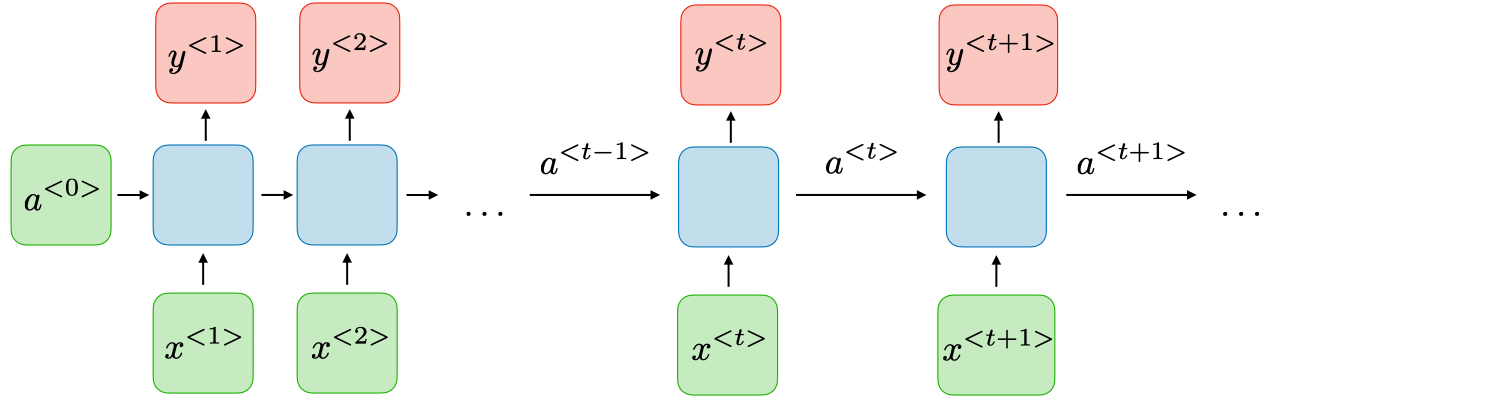

$x^{(<t>)}, y^{(<t>)}, a^{(<t>)}$ are the input, output, hidden state at each time step $t$, relatively.

For a detailed mathematical formulation, we have:
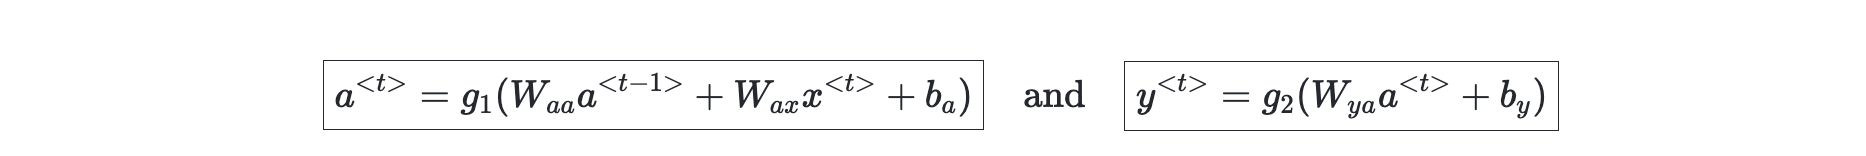

### RNN Applications
According to the applications, RNN can be adapted to a variety of tasks with different input-output relations. For example:
- One-to-Many (`Length(x)=1 << Length(y)`) :  **Music Generation**
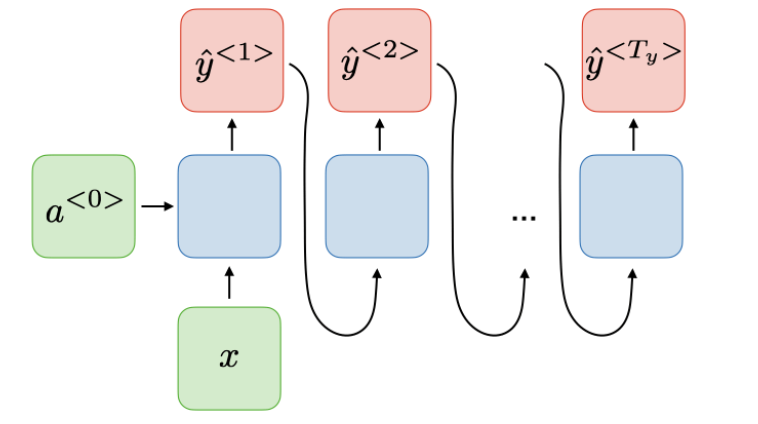

- Many-to-One (`Length(x) >> Length(y)=1`) :  **Sentiment Classification**
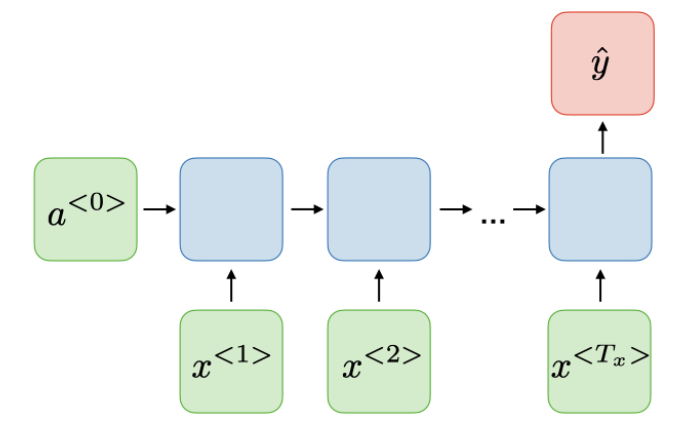

- Many-to-Many (`Length(x) = Length(y) >> 1`) :  **Name Entity Recognition**
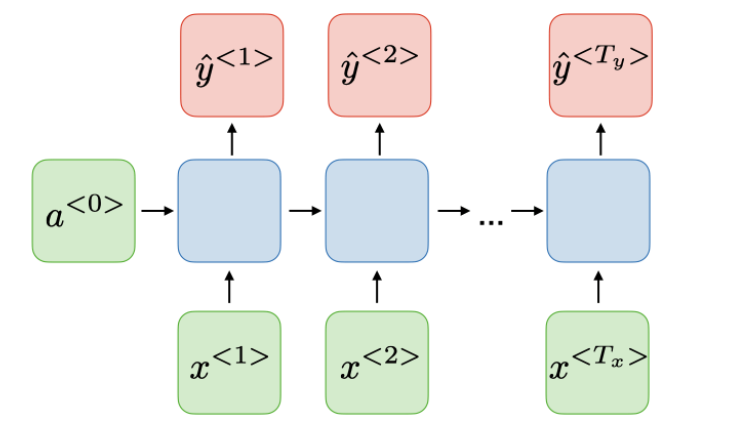

- Many-to-Many (`Length(x)=1` $\neq$ `Length(y)`) :  **Machine Translation**
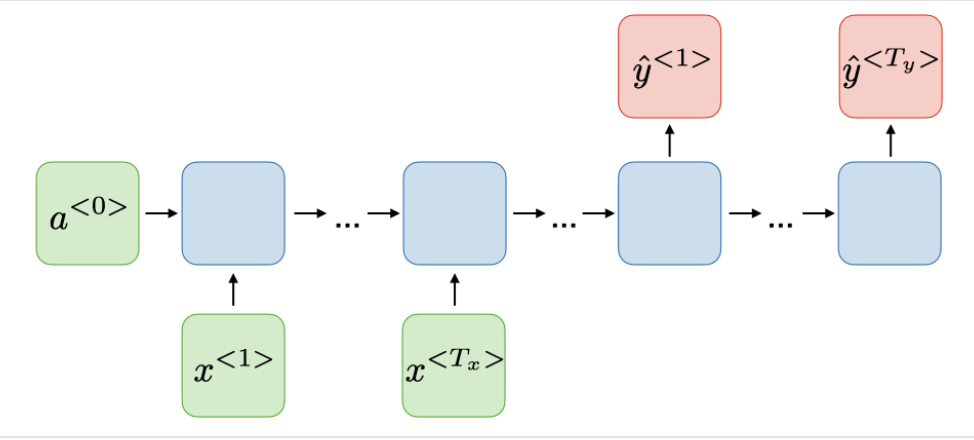


Next, we will see and play with some real dataset in sentiment analysis and machine translation tasks using RNN-based models.

## Task A. RNN for Sentiment Analysis

In this part, you will implement a basic RNN model using [Pytorch](https://pytorch.org/) for sentiment analysis, a binary classification task. 

In [ ]:
# import dependencies
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set the random seed for reproducible results
torch.manual_seed(0)

/home/mamooler/anaconda3/envs/modern_nlp/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Dataset Preparation

We will use the same IMDB review dataset as in Exercise 1 for sentiment classification. 
- You can download the dataset from [here](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download).
- Save as `.csv` file into `IMDB_DATA_PATH`.

In [ ]:
IMDB_DATA_PATH = 'IMDB.csv'

# Read and preview IMDB Dataset
IMDB_DF = pd.read_csv(IMDB_DATA_PATH)
IMDB_DF.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Convert sentiment labels into index
label_mapping = {'positive': 1, 'negative': 0}
IMDB_DF['sentiment'] = IMDB_DF['sentiment'].apply(lambda x: label_mapping[x])
IMDB_DF.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
import random

def preview_random_content():
  idx = random.randint(0, len(IMDB_DF))
  return IMDB_DF['review'][idx]

sample_review = preview_random_content()
print(sample_review)

Words cannot begin to describe how blandly terrible this movie is. I wish it were "so bad it's good," but it's not. It's just dull, lifeless, and boring. It's so bad I couldn't even laugh at it.<br /><br />In response to other posters, Anne-Marie Frigon is not the highlight of the movie. The only person less charismatic is the director Brett Kelly, who as a true statement on vanity, cast himself as the male lead. They both look like inbreeds, sister and brother.<br /><br />The gal, Sherry Thurig, is a looker. The complete opposite of Anne-Marie - attractive. This girl is tall and willowy, and can act. Although you can tell she's holding back.<br /><br />All the actors seem to be holding back, especially the supporting male, Mark. I've seen less wood in a rain forest, but he's still better than Kelly. Why would Kelly keep his actors from acting? Is he really that bad a director? Everyone else has summed the story up perfectly - there isn't one. Kids are kidnapped and Kelly steps in poo 

## Preprocessing
- 🎯 **Goal:** Implement the `imdb_preprocess()` function to clean the texts. For removing some special tokens (e.g. HTML or urls), you will need design some regular formats with `re` package; with word tokenization, you can find some useful functions on-the-shelf from `nltk` toolkit. 

- 💻  **API:** You can refer to [`nltk documentation`](https://www.nltk.org/) for more details.

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mamooler/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/mamooler/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
## TODO: Complete `imdb_preprocess` function following instructions ##
def imdb_preprocess(review):
    """
    Takes in a string of review, then performs the following:
    1. Remove HTML tag from review
    2. Remove URLs from review
    3. Make entire review lowercase
    4. Split the review in words
    5. Remove all punctuation
    6. Remove empty strings from review
    7. Remove all stopwords
    8. Returns a list of the cleaned review after joining them back to a sentence
    """
    # 1. Removing HTML tag from review
    # review_without_tag = ...
    
    # 2. Removing URLs
    # review_without_tag_and_url = ...

    # 3. Make entire string lowercase
    # review_lowercase = ...

    # 4. Split string into words (tips: using `word_tokenize` function in nltk!)
    # tokenized_words = ...
    
    # 5. Remove punctuation
    list_of_words_without_punctuation=[''.join(this_char for this_char in this_string if (this_char in string.ascii_lowercase))for this_string in tokenized_words]
     
    # 6. Remove empty strings
    list_of_words_without_punctuation = list(filter(None, list_of_words_without_punctuation))
    
    # 7. Remove stopwords
    #    - Get English Stopwords from WordNet (check nltk again!)
    #    - Filter the words in `en_stops` out
    # en_stops = ...
    # filtered_word_list = ...
    
    # 8. Returns a list of the cleaned review after jioning them back to a sentence
    return ' '.join(filtered_word_list)

In [ ]:
# TEST: preview the review after preprocessing #
imdb_preprocess(sample_review)

#### Build Vocabulary
- Indexing each unique word in the dataset

In [ ]:
from tqdm import tqdm

def build_vocab(vocab, review_list):
    """
    Reading train test directory
    """
    for review in tqdm(review_list):
      clean_review=imdb_preprocess(review)
      vocab.update(clean_review.split())
    return vocab

In [ ]:
from collections import Counter
vocab = Counter()
vocab = build_vocab(vocab, IMDB_DF['review'])

100%|██████████| 50000/50000 [02:27<00:00, 339.23it/s]


In [ ]:
# rank tokens in vocab by frequency
ranked_vocab_list = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

# print top-10 most frequent tokens
print(ranked_vocab_list[:10])

# get token2idx mapping as vocab_dict
token2idx = {w:i+1 for i, (w,f) in enumerate(ranked_vocab_list)}

print('Size of Vocab: ', len(token2idx))

Size of Vocab:  179721


> **Discussion** 🧐: Why the index of vocabulary dictionary starts from 1, instead of 0?

### Tokenization
- 🎯 **Goal:** Implement the `tokenize()` function to map each token in the texts into indices.

In [ ]:
def tokenize(review_text, token2idx, max_length=100):
  T = len(review_text.split())
  
  review_text_vec = torch.zeros((T), dtype=torch.long)
  for pos, word in enumerate(review_text.split()):
      ## TODO: Find the index of each word (pay attention to the unseen words) ##
      ...
  return review_text_vec

## TEST: preview the tokenized text ##
tokenize(imdb_preprocess(sample_review), token2idx)

### Define Pytorch Dataset
- Here we create a Pytorch Dataset&DataLoader with tokenized texts and corresponding labels. 
- We split the dataset into train_dataset and test_dataset using the function => [`torch.utils.data.random_split`](https://pytorch.org/docs/stable/data.html?highlight=torch+utils+data+random_split#torch.utils.data.random_split)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

In [ ]:
# create a pytorch Dataset class for our imported data
class IMDBReviewDataset(Dataset):
    def __init__(self, IMDB_DF, token2idx):
        
        self.data = IMDB_DF['review']
        self.labels = IMDB_DF['sentiment']
        self.token2idx = token2idx
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = tokenize(imdb_preprocess(self.data[idx]), token2idx)
        y = self.labels[idx]
        return x, y

## TODO: Split imdb_dataset into train_dataset (80%) and test_dataset (20%) ## 
imdb_dataset = IMDBReviewDataset(IMDB_DF, token2idx)
train_dataset, test_dataset = ...

## preview ##
''' print size and samples from train_dataset and test_dataset '''
print('Size of train_dataset: ', len(train_dataset))
print('Size of test_dataset: ', len(test_dataset))
print('train_dataset[0]: ', train_dataset[0])
print('test_dataset[0]: ', test_dataset[0])

Size of train_dataset:  40000
Size of test_dataset:  10000
train_dataset[0]:  (tensor([    63,      2,      3,     10,    224,     13,   4983,    237,    108,
            60,    307,    147,   1009,   1465,    963,    548,    109,     31,
             7,     46,      8,     44,    231,   1105,    150,   2273,    534,
          4259,   2327,   3066,   4248,  15712,    732,   6783,  29908,    130,
            39,   1065,   1177,   8096,    534,  29180,    264,   4681,   8924,
            80,   2872,    541,      6,     57,     54,     42,    324,     13,
             5,      2,   7925,   1114,     23,   6111,   3774,   2175,   1752,
           669,   1366,    779,     10,  41045, 150671,    668,     34,    408,
           871,    241,     12,   6340,  18190,  43004,   4259,   1130,    208,
          1285,  12400,    202,    185,  10803,   3745,   1495,   3772,    320,
          8446,   1650,   3066,  21077,     33,   2325,  10646,    182,    594,
           541,   3473,     62,   5560,  

#### Padding
- To load batches of data with Pytorch DataLoader, we need to ensure each input tensor are with the same length. Here we use the `longest_padding`, i.e., we will add '0'(padding index) to compensate shorter sequences as the same as the longest.

In [ ]:
def padding_(sentences, seq_len):
    features = torch.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
      if len(review) != 0:
          features[ii, :len(review)] = torch.as_tensor(review)[:seq_len]
    return features

In [ ]:
def pad_batch(batch, pad_length=500):
    input_tensors = []
    labels = []
    lengths = []
    for x, y in batch:
        input_tensors.append(x)
        labels.append(y)
        lengths.append(x.shape[0]) #Assume shape is (#tokens, *)
    longest = max(lengths)

    # TODO: add padding for a batch of input_tensors #
    x_packed = ...
    y_batched = torch.as_tensor(labels, dtype=torch.long)
    return x_packed, y_batched

In [ ]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=pad_batch)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_batch)

In [ ]:
## preview ##
for x,y in train_loader:
  print(x)
  print(y)
  break

> **Discussion** 🧐: Is the longest_padding always the best way to do? 
> - Think about extreme examples.

> Extra Reference: How to avoid encoding `<pad>` tokens?
- Feel free to check [`pad_packed_sequence`](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_packed_sequence.html) and [`pack_padded_sequence`](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html) functions.
- This [demo tutorial](https://gist.github.com/HarshTrivedi/f4e7293e941b17d19058f6fb90ab0fec) is also really helpful for further understanding ;)

### RNN for Sentiment Analysis
- We will implement a complete model for sentiment classification with an Embedding layer, a RNN layer and a Linear dense layer to get a output in `n_cls` dimension.

#### Embedding of Tokens
- 🎯 **Goal:** Implement `get_embedding_layer` function to embed each token index.

- 💻  **API:** You can refer to [`torch.nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html?highlight=embedding#torch.nn.Embedding)

In [ ]:
def get_embedding_layer(vocab_size, embedding_dim, padding_idx = 0):
  # TODO: define embedding_layer with given parameters #
  embedding_layer = ...
  return embedding_layer

##### RNN Layer
- 🎯 **Goal:** Implement the `get_rnn_layer` function with various parameters.

- 💻  **API:** You can refer to [`torch.nn.RNN`](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html?highlight=rnn#torch.nn.RNN) for more details.

In [ ]:
def get_rnn_layer(rnn_input_dim, 
                  rnn_hidden_dim,
                  num_layers=1,
                  batch_first=True,
                  bidirectional=False,
                  rnn_type='rnn'):
  if rnn_type=='rnn':
    return torch.nn.RNN(input_size=rnn_input_dim,            # The number of expected features in the input x
                      hidden_size=rnn_hidden_dim,            # The size of the hidden state vector h
                      num_layers=num_layers,                 # Number of recurrent layers. E.g., setting num_layers=2 would stack two RNNs together
                      batch_first=batch_first,                 # If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature).
                      bidirectional=bidirectional,           # If True, becomes a bidirectional RNN (you can play around to see what would happen :)
                      )
  elif rnn_type=='gru':
    # TODO: define GRU Layer with given parameters #
    return ...
  else:
    # TODO: define LSTM Layer with given parameters #
    return ...

> **Discussion** 🧐:  What is the dimension and meaning for each dim of the output from RNN layer?
> 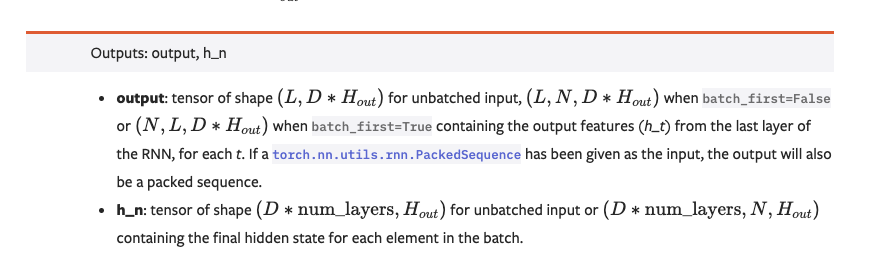

#### Implement `SimpleRNN`
- 🎯 **Goal:** Implement the `SimpleRNN` class with a rnn layer and dense(linear) layer

- 💻  **API:** You can use previous implemented functions and refer to pytorch documentation for more details.

In [ ]:
class SimpleRNN(nn.Module):
  def __init__(self, 
               vocab,
               embedding_dim,
               hidden_dim,
               num_rnn_layers, 
               output_dim):
      super().__init__()

      # set class features
      self.vocab = vocab 
      self.embedding_dim = embedding_dim
      self.hidden_dim = hidden_dim
      self.output_dim = output_dim
      self.num_rnn_layers = num_rnn_layers

      # TODO: define Embedding layer #
      vocab_size = ...
      self.embedding = ...

      # TODO: define RNN layer #
      self.rnn = ...
      ## challenge: Try to set `bidirectional` to True? 

      # TODO: define dense layer #
      self.linear = ...

  def forward(self, x):
    # TODO: get the output follow the process => [embedding->get the last output from rnn->apply dense layer] #
    # you can write multiple lines of codes
    x = ...
    return x

In [ ]:
num_class = 2
rnn_model = SimpleRNN(token2idx, 
                      embedding_dim=128,
                      hidden_dim=256,
                      num_rnn_layers=2,
                      output_dim = num_class)

In [ ]:
# TEST: Check the output and its dimension #
for x,y in train_loader:
  print(x)
  print(y)
  break

rnn_model(x) # tl;dr
rnn_model(x).shape

torch.Size([32, 2])

#### Implement the Training Loop
- 🎯 **Goal:** Implement the `train_epoch` function to train the model on a given dataloader for one epoch. 
- After that, given the `eval_epoch`, we will combine them for a complete training loop for multiple epochs.

In [ ]:
## TODO: Implement `train_epoch` function for one-epoch training following the instructions ##
def train_epoch(model, train_loader, criterion, optimizer, device):
    # Set the model to training mode. This will turn on layers that would
    # otherwise behave differently during evaluation, such as dropout.
    model.train()

    # Record the number of correct predictions and total loss
    num_correct = ...
    running_epoch_loss = ...

    for i, batch in enumerate(tqdm(train_loader, desc='Training '), 0):
      x, y = batch
      # Step 1: Perform the forward pass of the model
      output = ...

      # Step 2: Calculate loss using output and the ground-truth label
      loss = criterion(output, y)

      # Step 3
      # Clear the gradient buffers of optimizer.
      # Otherwise, gradients from the previous batch would be accumulated.
      # [one line of code] 
      ...

      # Step 4: backpropgate loss
      # [one line of code] 
      ...

      # Step 5: update optimizer
      # [one line of code] 
      ...

      # Step 6: get predicted label
      y_pred = ...

      # Step 7: update statistics
      num_correct += ...
      running_epoch_loss += ...

    # print stats
    epoch_loss = running_epoch_loss / len(train_loader)
    epoch_acc = num_correct / len(train_loader.dataset)
    print(f'Training => Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}')
    return epoch_loss, epoch_acc

In [ ]:
# Evaluate the model after each training epoch #
def eval_epoch(model, eval_loader, criterion, device):
  batch_loss = 0
  batch_acc = 0

  model.eval()
  num_correct = 0
  running_epoch_loss = 0.0

  with torch.no_grad():
    for i, batch in enumerate(tqdm(eval_loader, desc='Evaluation '), 0):
        x, y = batch

        # Perform the forward pass of the model
        output = model(x)
        
        # Compute and print loss
        loss = criterion(output, y)
        y_pred = output.argmax(dim=1)

        num_correct += (y_pred == y).sum().item()
        running_epoch_loss += loss.item()

  eval_loss = running_epoch_loss / len(eval_loader)
  eval_acc = num_correct / len(eval_loader.dataset)

  print(f'Evaluation => Loss: {eval_loss:.4f} | Accuracy: {eval_acc:.4f}')
  return eval_loss, eval_acc

In [ ]:
## TODO: Implement Whole Training Process: Combine train_epoch and eval_epoch ## 

def train(model, train_loader, eval_loader, epochs, criterion, optimizer, device):
  train_loss_list = []
  train_acc_list = []
  eval_loss_list = []
  eval_acc_list = []
  for epoch in range(epochs):
    print(f'=== Epoch: {epoch} ===')
    ## TODO: trian&eval for one epoch ## 
    train_loss, train_acc = ...
    eval_loss, eval_acc = ...
    
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    eval_loss_list.append(eval_loss)
    eval_acc_list.append(eval_acc)
  return train_loss_list, train_acc_list, eval_loss_list, eval_acc_list


In [ ]:
import torch.optim as optim
EPOCHS = 5
CRITERION = nn.CrossEntropyLoss()
OPTIMIZER = optim.Adam(rnn_model.parameters(), lr=1e-4)
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_loss_list, train_acc_list, eval_loss_list, eval_acc_list = train(rnn_model, train_loader, test_loader, epochs=EPOCHS, criterion=CRITERION, optimizer=OPTIMIZER, device=DEVICE)

> **Discussion** 🧐: Analyze your training curve. you can try to use visualization tools to see what it looks like ;)

### Inference
After training the model, you can use it to predict the sentiment of a given text. 
Since the training time might be long, feel free to download the pretrained-checkpoint [here](https://drive.google.com/file/d/1o79CWC7PmEiIREv-ErOV_CqMgbQUx4Sd/view?usp=share_link), and play around with that.

In [ ]:
def load_torch_ckpt(model, ckpt_path):
  ckpt = torch.load(ckpt_path)
  model.load_state_dict(ckpt)
  return model

num_class = 2
rnn_model = SimpleRNN(token2idx, 
                      embedding_dim=128,
                      hidden_dim=256,
                      num_rnn_layers=2,
                      output_dim = num_class)
model = load_torch_ckpt(rnn_model, 'ex3_rnn_model.pt') # replace the ckpt_path with where you save the ckpt weights into

In [ ]:
def predict(model, input_text):
  model.eval()
  x = tokenize(input_text, token2idx)
  output = model(x.unsqueeze(0))
  y_pred = output.argmax(dim=1)
  if y_pred.item == 1:
    predict_sent = 'positive'
  else:
    predict_sent = 'negative'
  print(f'Input Text => {input_text}')
  print(f'Predicted Sentiment => {predict_sent}')

In [ ]:
sample_review = "What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a director for hire and didn't instill the project with the passion that it deserved."

predict(model, sample_review)

Input Text => What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a dire

## Task B. Machine Translation with Attention

#### Background: Pitfall of basic RNN structure

In recent years, basic RNN are seldom seen to be used as a mainstream architecture for NLP tasks, especially for NLG (natural language generation) tasks related to long documents. The reason is RNN-based model is not good at process long sequences since it would catastropically forget of the input tokens at the very beginning even if they might include salient semantic information. 

Below is the diagram shows the performance of RNN models as the sentence length increases [[Bahdanau et al.,2015](https://arxiv.org/abs/1409.0473)]. The BLEU is used to compare the distance between two sentences, which is an simple and conventional reference-based evaluation metric in a lot of generation tasks. I will refer you to [the original paper](https://aclanthology.org/P02-1040/) for more details about BLEU if you are interested :)

#### Solution: RNN with Attention

To improve upon the simple RNN model we’ll use an attention mechanism in the following section, which lets the decoder learn to focus over all tokens throughout the input sequence according to their importance instead of position.

#### Basic RNN-based Sequence-to-sequence model for Machine Translation
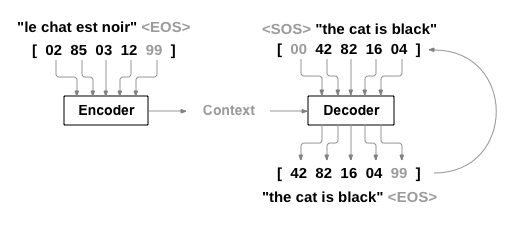

#### Data Preprocessing
- You can download the processed dataset from [here](https://drive.google.com/file/d/1-0q6zwJGd9eBpcqdvYzVSzUsg9fHSG08/view?usp=share_link). You can store the `.csv` file into `data_path`.

In [ ]:
data_path = '/content/drive/Shareddrives/EPFL-Research/CS552/Exercise/processed_en_fr.csv'

In [ ]:
translation_DF = pd.read_csv(data_path)
translation_DF.head()

,EN,FR
0,i m at a loss for words .,j en perds mes mots .
1,i m at a loss for words .,les mots me manquent .
2,i m at a loss for words .,je ne trouve pas les mots .
3,you re in better shape than i am .,tu es en meilleure forme que moi .
4,you are in my way .,tu es sur mon chemin .


#### Build Vocabulary
- 🎯 **Goal:** Implement the `Vocab` class with all information about vocabulary dict

- Different from sentiment analysis (many-to-one) task, we need two more special tokens for seq2seq generation task: i) `<sos>`: the start of the sentence; i) `<eos>`: the end of the sentence.


In [ ]:
SOS_token = '<sos>'
EOS_token = '<eos>'
PAD_token = '<pad>'
SOS_index = 1
EOS_index = 2
PAD_index = 0

class Vocab:
    def __init__(self):
        self.token2index = {}
        self.token2count = {}
        self.index2token = {0: '<pad>', 1: '<sos>', 2: '<eos>'}
        self.vocab_size = 3  # Count SOS and EOS

    def addSentence(self, sentence):
      # TODO: Add each word in the sentence into vocabulary dict #
      for token in sentence.split(' '):
          ...

    def addWord(self, token):
      # TODO: Add one word into vocabulary dict #
      # you should update `token2index`, `token2count`, `index2token`, `vocab_size`
      if token not in self.token2index:
          ...
      else:
          ...

In [ ]:
# TEST: build vocab for source language (EN) and target language (FR) #
Vocab_EN = Vocab()
Vocab_FR = Vocab()
train_pairs = []

for i, (en, fr) in translation_DF.iterrows():
  Vocab_EN.addSentence(en)
  Vocab_FR.addSentence(fr)
  train_pairs.append((en, fr))

print('Size of Sentence-pairs: ', len(train_pairs))
print('Size of English Vocab: ', Vocab_EN.vocab_size)
print('Size of French Vocab: ', Vocab_FR.vocab_size)

## Encoder
The encoder of a seq2seq network is a RNN which map each input word to a vector and a hidden state, and uses the hidden state for the next input word.


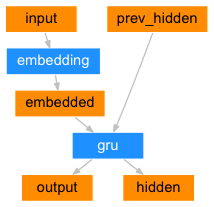

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, in_vocab, hidden_dim):
        super(EncoderRNN, self).__init__()
        self.vocab = in_vocab
        self.vocab_size = self.vocab.vocab_size
        self.hidden_dim = hidden_dim
        self.embedding_dim = hidden_dim

        # TODO: define embedding layer corresponding to given `vocab` and `embedding_dim` #
        self.embedding = ...

        # TODO: define a 1-layers, uni-directional RNN with GRU architecture #
        # feel free to use previous implemented function (get_rnn_layer)
        self.rnn = ...

    def forward(self, input, hidden):
        # TODO: calculate the embedded tokens and output from rnn layer #
        embedded = ...
        output, hidden = ...
        return output, hidden

    def initHidden(self):
        return torch.randn(1, 1, self.hidden_dim, device=DEVICE)

#### Decoder
We start with the simple version of decoder. For the basic rnn-based decoder, the `<SOS>` token and the contextual vector (the last output state) from Encoder are input to the decoder as the initial state. 
- ⚠️ In this case, since the contextual vector tend to include more information about tokens close to the end of the sentence while forgetting about the tokens at the beginning, the decoder could not get the information from the beginning tokens.

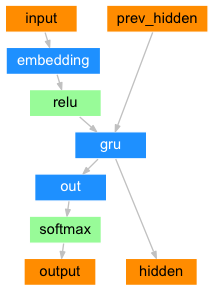

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_dim, output_dim):
        super(DecoderRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.embedding_dim = hidden_dim

        # TODO: define embedding layer corresponding to given `vocab` and `embedding_dim` #
        # Think about what should be the input dimension here?
        self.embedding = ...
        self.rnn = get_rnn_layer(rnn_input_dim=hidden_dim, 
                               rnn_hidden_dim=hidden_dim, 
                               num_layers=1,
                               bidirectional=False,
                               rnn_type='gru') 
        self.out = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.rnn(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.randn(1, 1, self.hidden_dim, device=DEVICE)

#### Decoder with Attention
Attention mechanism allows the decoder DIRECTLY FOCUS ON EACH TOKENS by calculating ***attention weights*** for every step of the decoder’s own outputs. First we calculate a set of attention weights. 

The attention score would further multiplied by the encoder output vectors to create a ***weighted combination***. The result (`attn_applied` in the code) indicates the significance of each part of input sequence to the decoder output, and thus help the decoder choose the right output words.

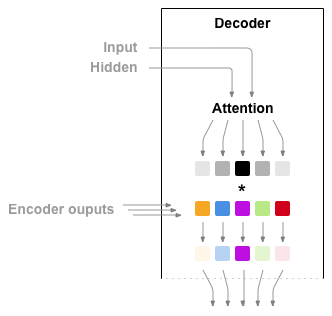 

Calculating the attention weights is done with another **feed-forward layer** (`attn`: *using the decoder’s input and hidden state as inputs*). In the real implementation, we have to set the attention matrix length as the maximum target sentence length in the training set. 
i.e. ***Sentences of the maximum length will use all the attention weights, while shorter sentences will only use the first few***.

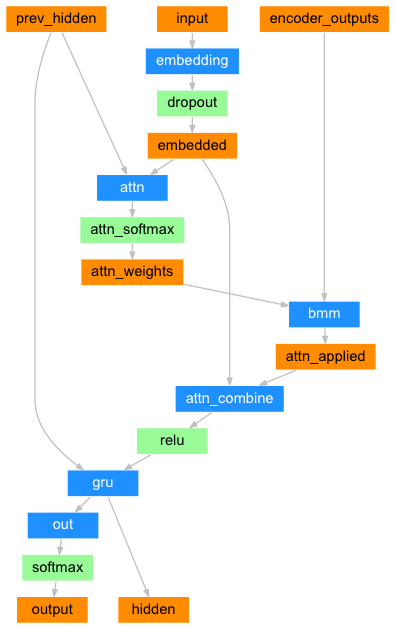

In [ ]:
MAX_LENGTH = 10

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_dim, output_dim, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.dropout_p = dropout_p
        self.max_length = max_length

        # TODO: define embedding layer corresponding to given `vocab` and `embedding_dim` #
        # Think about what should be the input dimension here?
        self.embedding = ...

        # TODO: define attn layer to compute attention weights #
        # Think about what should be the input dimension for attn?
        self.attn = ...

        # TODO: define feed-forward(linear) layer to combine information from attention layer and embedding layer #
        # Refer to the Diagram!
        self.attn_combine = ...
        self.dropout = nn.Dropout(self.dropout_p)
        self.rnn = get_rnn_layer(rnn_input_dim=hidden_dim, 
                               rnn_hidden_dim=hidden_dim, 
                               num_layers=1,
                               bidirectional=False,
                               rnn_type='gru') 
        
        # TODO: define feed-forward(linear) layer to output #
        self.out = ...

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        # TODO: compute attention weights #
        attn_weights = ...
        attn_weights = F.softmax(attn_weights, dim=1)

        # TODO: multiply attention weights and contextual vector #
        attn_applied = ...
        
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.rnn(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.randn(1, 1, self.hidden_dim, device=DEVICE)

> **Discussion** 🧐: What is the input dimension of nn.Embedding layer for EncoderRNN and DecoderRNN respectively? Are they the same or different? Why?

#### Model Training
Train the Encoder-Decoder model to generate the target-language translation token-by-token

In [ ]:
def indexesFromSentence(vocab, sentence):
    return [vocab.token2index[token] for token in sentence.split(' ')]


def tensorFromSentence(vocab, sentence):
    indexes = indexesFromSentence(vocab, sentence)
    indexes.append(EOS_index)
    return torch.tensor(indexes, dtype=torch.long, device=DEVICE).view(-1, 1)


def tensorsFromPair(pair, in_vocab, out_vocab):
    input_tensor = tensorFromSentence(in_vocab, pair[0])
    target_tensor = tensorFromSentence(out_vocab, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
# Tokenize words in source-language & target-language sentences
train_tensor_pairs = [tensorsFromPair(p, Vocab_EN, Vocab_FR) for p in tqdm(train_pairs)]

100%|██████████| 131203/131203 [00:04<00:00, 28756.26it/s]


#### Training Loop
- **(Extra Trick) Teacher Forcing**: For some probability (*teacher_forcing_ratio*), no_matter what's the model's current prediction, the next token in the generated sequence will be from the ground-truth reference.

- Feel free to play with various value of *teacher_forcing_ratio* and compare the translation results :)

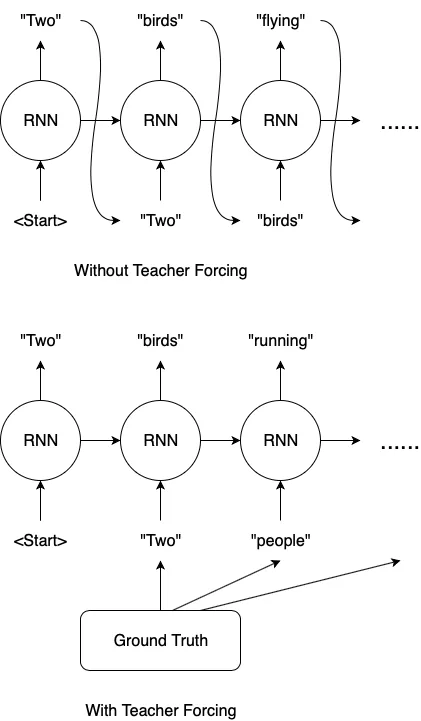

In [ ]:
teacher_forcing_ratio = 0.5

def train(input_tensor, 
          target_tensor, 
          encoder, 
          decoder, 
          encoder_optimizer, 
          decoder_optimizer, 
          criterion, 
          max_length=MAX_LENGTH,
          ):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_dim, device=DEVICE)

    loss = 0.0

    for ei in range(input_length):
        # TODO: Get Contextual Vector from Encoder #
        encoder_output, encoder_hidden = ...
        encoder_outputs[ei] = encoder_output[0, 0]
    
    # TODO: Initialize the input and hidden state for decoder #
    decoder_input = ...
    decoder_hidden = ...

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            # TODO: predict next state using decoder #
            decoder_output, decoder_hidden, decoder_attention = ...
            # TODO: calculate loss #
            loss += ...
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            # TODO: predict next state using decoder #
            decoder_output, decoder_hidden, decoder_attention = ...
            # TODO: predict next token with the greatest probability score #
            topv, topi = ...
            decoder_input = topi.squeeze().detach()  # detach from history as input

            # TODO: calculate loss #
            loss += ...

            # TODO: Stop criterion => when to stop generating? #
            if decoder_input.item() == EOS_index:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [ ]:
# Train for several iterations #
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=500, learning_rate=0.0005):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0   # Reset every plot_every

    encoder_optimizer = optim.AdamW(encoder.parameters(), lr=learning_rate, weight_decay=1e-6)
    decoder_optimizer = optim.AdamW(decoder.parameters(), lr=learning_rate, weight_decay=1e-6)
    criterion = nn.NLLLoss()

    for iter in tqdm(range(1, n_iters + 1), desc='Training '):
        training_pair = train_tensor_pairs[(iter - 1)%len(train_pairs)]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
# Inference: predict the translation #
def evaluate(encoder, decoder, in_vocab, out_vocab, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(in_vocab, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_dim, device=DEVICE)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_index]], device=DEVICE)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_index:
                decoded_words.append(EOS_token)
                break
            else:
                decoded_words.append(out_vocab.index2token[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
# Output some generated samples randomly #
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(train_pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, Vocab_EN, Vocab_FR, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

Training :   1%|          | 50/5000 [00:19<21:25,  3.85it/s]

0m 19s (- 32m 37s) (50 1%) 6.1166


Training :   2%|▏         | 100/5000 [00:43<37:55,  2.15it/s]

0m 43s (- 35m 23s) (100 2%) 5.0690


Training :   3%|▎         | 150/5000 [01:05<37:15,  2.17it/s]

1m 5s (- 35m 8s) (150 3%) 5.0329


Training :   4%|▍         | 200/5000 [01:26<28:06,  2.85it/s]

1m 26s (- 34m 34s) (200 4%) 5.3675


Training :   5%|▌         | 250/5000 [01:51<40:53,  1.94it/s]

1m 51s (- 35m 10s) (250 5%) 4.7789


Training :   6%|▌         | 300/5000 [02:13<33:03,  2.37it/s]

2m 13s (- 34m 55s) (300 6%) 5.1765


Training :   7%|▋         | 350/5000 [02:38<38:17,  2.02it/s]

2m 38s (- 35m 1s) (350 7%) 5.0997


Training :   8%|▊         | 400/5000 [03:04<53:58,  1.42it/s]  

3m 4s (- 35m 18s) (400 8%) 5.3641


Training :   9%|▉         | 450/5000 [03:28<33:17,  2.28it/s]

3m 28s (- 35m 5s) (450 9%) 4.9276


Training :  10%|█         | 500/5000 [03:50<29:51,  2.51it/s]

3m 50s (- 34m 32s) (500 10%) 4.9782


Training :  11%|█         | 550/5000 [04:11<32:12,  2.30it/s]

4m 11s (- 33m 53s) (550 11%) 5.0998


Training :  12%|█▏        | 600/5000 [04:33<34:22,  2.13it/s]

4m 33s (- 33m 27s) (600 12%) 4.8262


Training :  13%|█▎        | 650/5000 [04:57<39:11,  1.85it/s]

4m 57s (- 33m 10s) (650 13%) 5.2126


Training :  14%|█▍        | 700/5000 [05:20<26:59,  2.65it/s]

5m 20s (- 32m 45s) (700 14%) 4.7924


Training :  15%|█▌        | 750/5000 [05:45<36:34,  1.94it/s]

5m 45s (- 32m 35s) (750 15%) 4.6818


Training :  16%|█▌        | 800/5000 [06:10<31:17,  2.24it/s]

6m 10s (- 32m 23s) (800 16%) 4.5032


Training :  17%|█▋        | 850/5000 [06:34<33:39,  2.05it/s]

6m 34s (- 32m 7s) (850 17%) 4.8072


Training :  18%|█▊        | 900/5000 [06:57<30:51,  2.21it/s]

6m 57s (- 31m 43s) (900 18%) 4.6325


Training :  19%|█▉        | 950/5000 [07:21<27:54,  2.42it/s]

7m 21s (- 31m 23s) (950 19%) 4.6095


Training :  20%|██        | 1000/5000 [07:46<27:45,  2.40it/s]

7m 46s (- 31m 7s) (1000 20%) 4.6970


Training :  21%|██        | 1050/5000 [08:09<23:57,  2.75it/s]

8m 9s (- 30m 42s) (1050 21%) 3.9502


Training :  22%|██▏       | 1100/5000 [08:33<29:45,  2.18it/s]

8m 33s (- 30m 22s) (1100 22%) 4.7549


Training :  23%|██▎       | 1150/5000 [08:59<32:07,  2.00it/s]

8m 59s (- 30m 4s) (1150 23%) 4.0471


Training :  24%|██▍       | 1200/5000 [09:22<29:58,  2.11it/s]

9m 22s (- 29m 41s) (1200 24%) 4.0122


Training :  25%|██▌       | 1250/5000 [09:46<25:39,  2.44it/s]

9m 46s (- 29m 20s) (1250 25%) 4.6713


Training :  26%|██▌       | 1300/5000 [10:09<28:24,  2.17it/s]

10m 9s (- 28m 54s) (1300 26%) 3.7068


Training :  27%|██▋       | 1350/5000 [10:32<28:38,  2.12it/s]

10m 32s (- 28m 31s) (1350 27%) 4.2116


Training :  28%|██▊       | 1400/5000 [10:57<29:39,  2.02it/s]

10m 57s (- 28m 10s) (1400 28%) 4.2700


Training :  29%|██▉       | 1450/5000 [11:19<33:19,  1.78it/s]

11m 19s (- 27m 44s) (1450 28%) 4.3822


Training :  30%|███       | 1500/5000 [11:42<29:51,  1.95it/s]

11m 42s (- 27m 19s) (1500 30%) 4.5824


Training :  31%|███       | 1550/5000 [12:06<24:02,  2.39it/s]

12m 6s (- 26m 57s) (1550 31%) 5.4945


Training :  32%|███▏      | 1600/5000 [12:29<28:49,  1.97it/s]

12m 29s (- 26m 33s) (1600 32%) 5.0572


Training :  33%|███▎      | 1650/5000 [12:53<26:47,  2.08it/s]

12m 53s (- 26m 11s) (1650 33%) 5.2179


Training :  34%|███▍      | 1700/5000 [13:18<25:52,  2.13it/s]

13m 18s (- 25m 49s) (1700 34%) 5.2212


Training :  35%|███▌      | 1750/5000 [13:42<25:12,  2.15it/s]

13m 42s (- 25m 27s) (1750 35%) 4.8466


Training :  36%|███▌      | 1800/5000 [14:04<25:19,  2.11it/s]

14m 4s (- 25m 2s) (1800 36%) 4.6321


Training :  37%|███▋      | 1850/5000 [14:28<23:43,  2.21it/s]

14m 28s (- 24m 38s) (1850 37%) 4.7703


Training :  38%|███▊      | 1900/5000 [14:52<26:18,  1.96it/s]

14m 52s (- 24m 15s) (1900 38%) 4.6007


Training :  39%|███▉      | 1950/5000 [15:15<22:17,  2.28it/s]

15m 15s (- 23m 52s) (1950 39%) 4.5731


Training :  40%|████      | 2000/5000 [15:39<22:03,  2.27it/s]

15m 39s (- 23m 28s) (2000 40%) 4.2675


Training :  41%|████      | 2050/5000 [16:03<28:33,  1.72it/s]

16m 3s (- 23m 7s) (2050 41%) 4.6086


Training :  42%|████▏     | 2100/5000 [16:27<22:33,  2.14it/s]

16m 27s (- 22m 43s) (2100 42%) 4.5108


Training :  43%|████▎     | 2150/5000 [16:54<22:32,  2.11it/s]

16m 54s (- 22m 24s) (2150 43%) 4.8265


Training :  44%|████▍     | 2200/5000 [17:15<19:45,  2.36it/s]

17m 15s (- 21m 58s) (2200 44%) 4.5461


Training :  45%|████▌     | 2250/5000 [17:38<18:57,  2.42it/s]

17m 38s (- 21m 33s) (2250 45%) 5.2951


Training :  46%|████▌     | 2300/5000 [18:03<21:30,  2.09it/s]

18m 3s (- 21m 11s) (2300 46%) 5.3405


Training :  47%|████▋     | 2350/5000 [18:27<22:12,  1.99it/s]

18m 27s (- 20m 49s) (2350 47%) 5.2654


Training :  48%|████▊     | 2400/5000 [18:53<24:41,  1.76it/s]

18m 53s (- 20m 28s) (2400 48%) 4.7676


Training :  49%|████▉     | 2450/5000 [19:19<22:56,  1.85it/s]

19m 19s (- 20m 7s) (2450 49%) 5.4864


Training :  50%|█████     | 2500/5000 [19:44<19:35,  2.13it/s]

19m 44s (- 19m 44s) (2500 50%) 5.3660


Training :  51%|█████     | 2550/5000 [20:08<19:30,  2.09it/s]

20m 8s (- 19m 21s) (2550 51%) 5.4639


Training :  52%|█████▏    | 2600/5000 [20:33<22:14,  1.80it/s]

20m 33s (- 18m 58s) (2600 52%) 5.2847


Training :  53%|█████▎    | 2650/5000 [20:58<22:40,  1.73it/s]

20m 58s (- 18m 35s) (2650 53%) 5.1226


Training :  54%|█████▍    | 2700/5000 [21:21<16:44,  2.29it/s]

21m 21s (- 18m 11s) (2700 54%) 4.8139


Training :  55%|█████▌    | 2750/5000 [21:47<20:14,  1.85it/s]

21m 47s (- 17m 49s) (2750 55%) 5.2292


Training :  56%|█████▌    | 2800/5000 [22:08<15:49,  2.32it/s]

22m 8s (- 17m 23s) (2800 56%) 4.2475


Training :  57%|█████▋    | 2850/5000 [22:33<14:59,  2.39it/s]

22m 33s (- 17m 0s) (2850 56%) 4.7663


Training :  58%|█████▊    | 2900/5000 [22:54<18:37,  1.88it/s]

22m 54s (- 16m 35s) (2900 57%) 4.5233


Training :  59%|█████▉    | 2950/5000 [23:19<14:22,  2.38it/s]

23m 19s (- 16m 12s) (2950 59%) 4.6580


Training :  60%|██████    | 3000/5000 [23:43<14:39,  2.27it/s]

23m 43s (- 15m 48s) (3000 60%) 4.9487


Training :  61%|██████    | 3050/5000 [24:08<17:20,  1.87it/s]

24m 8s (- 15m 25s) (3050 61%) 5.2494


Training :  62%|██████▏   | 3100/5000 [24:30<13:37,  2.32it/s]

24m 30s (- 15m 1s) (3100 62%) 5.7284


Training :  63%|██████▎   | 3150/5000 [24:54<13:24,  2.30it/s]

24m 54s (- 14m 38s) (3150 63%) 5.4793


Training :  64%|██████▍   | 3200/5000 [25:16<13:23,  2.24it/s]

25m 16s (- 14m 13s) (3200 64%) 4.8980


Training :  65%|██████▌   | 3250/5000 [25:41<13:13,  2.21it/s]

25m 41s (- 13m 50s) (3250 65%) 4.9436


Training :  66%|██████▌   | 3300/5000 [26:06<12:45,  2.22it/s]

26m 6s (- 13m 26s) (3300 66%) 5.2358


Training :  67%|██████▋   | 3350/5000 [26:32<12:40,  2.17it/s]

26m 32s (- 13m 4s) (3350 67%) 5.1718


Training :  68%|██████▊   | 3400/5000 [26:57<14:16,  1.87it/s]

26m 57s (- 12m 41s) (3400 68%) 4.9276


Training :  69%|██████▉   | 3450/5000 [27:22<14:01,  1.84it/s]

27m 22s (- 12m 18s) (3450 69%) 5.4201


Training :  70%|███████   | 3500/5000 [27:47<13:35,  1.84it/s]

27m 47s (- 11m 54s) (3500 70%) 4.8321


Training :  71%|███████   | 3550/5000 [28:12<11:42,  2.06it/s]

28m 12s (- 11m 31s) (3550 71%) 4.9186


Training :  72%|███████▏  | 3600/5000 [28:38<11:12,  2.08it/s]

28m 38s (- 11m 8s) (3600 72%) 4.7891


Training :  73%|███████▎  | 3650/5000 [29:03<10:32,  2.14it/s]

29m 3s (- 10m 44s) (3650 73%) 4.9370


Training :  74%|███████▍  | 3700/5000 [29:30<11:04,  1.96it/s]

29m 30s (- 10m 22s) (3700 74%) 5.7023


Training :  75%|███████▌  | 3750/5000 [29:56<12:18,  1.69it/s]

29m 56s (- 9m 58s) (3750 75%) 5.5613


Training :  76%|███████▌  | 3800/5000 [30:20<08:43,  2.29it/s]

30m 20s (- 9m 34s) (3800 76%) 5.2927


Training :  77%|███████▋  | 3850/5000 [30:46<11:25,  1.68it/s]

30m 46s (- 9m 11s) (3850 77%) 5.1143


Training :  78%|███████▊  | 3900/5000 [31:14<10:12,  1.80it/s]

31m 14s (- 8m 48s) (3900 78%) 5.1141


Training :  79%|███████▉  | 3950/5000 [31:38<07:53,  2.22it/s]

31m 38s (- 8m 24s) (3950 79%) 4.5923


Training :  80%|████████  | 4000/5000 [32:02<07:35,  2.19it/s]

32m 2s (- 8m 0s) (4000 80%) 4.0511


Training :  81%|████████  | 4050/5000 [32:25<08:33,  1.85it/s]

32m 25s (- 7m 36s) (4050 81%) 4.1653


Training :  82%|████████▏ | 4100/5000 [32:49<06:56,  2.16it/s]

32m 49s (- 7m 12s) (4100 82%) 4.5536


Training :  83%|████████▎ | 4150/5000 [33:12<06:32,  2.17it/s]

33m 12s (- 6m 48s) (4150 83%) 4.0539


Training :  84%|████████▍ | 4200/5000 [33:36<07:05,  1.88it/s]

33m 36s (- 6m 24s) (4200 84%) 3.9969


Training :  85%|████████▌ | 4250/5000 [34:02<06:24,  1.95it/s]

34m 2s (- 6m 0s) (4250 85%) 3.6852


Training :  86%|████████▌ | 4300/5000 [34:27<04:57,  2.35it/s]

34m 27s (- 5m 36s) (4300 86%) 4.9873


Training :  87%|████████▋ | 4350/5000 [34:52<05:49,  1.86it/s]

34m 52s (- 5m 12s) (4350 87%) 4.4767


Training :  88%|████████▊ | 4400/5000 [35:19<05:00,  2.00it/s]

35m 19s (- 4m 48s) (4400 88%) 4.6568


Training :  89%|████████▉ | 4450/5000 [35:45<05:24,  1.69it/s]

35m 45s (- 4m 25s) (4450 89%) 5.2213


Training :  90%|█████████ | 4500/5000 [36:11<04:28,  1.86it/s]

36m 11s (- 4m 1s) (4500 90%) 4.8364


Training :  91%|█████████ | 4550/5000 [36:36<03:17,  2.28it/s]

36m 36s (- 3m 37s) (4550 91%) 5.0757


Training :  92%|█████████▏| 4600/5000 [37:02<03:34,  1.86it/s]

37m 2s (- 3m 13s) (4600 92%) 4.2231


Training :  93%|█████████▎| 4650/5000 [37:27<02:56,  1.99it/s]

37m 27s (- 2m 49s) (4650 93%) 4.5780


Training :  94%|█████████▍| 4700/5000 [37:52<02:34,  1.94it/s]

37m 52s (- 2m 25s) (4700 94%) 5.1050


Training :  95%|█████████▌| 4750/5000 [38:19<02:25,  1.72it/s]

38m 19s (- 2m 1s) (4750 95%) 4.8113


Training :  96%|█████████▌| 4800/5000 [38:44<01:47,  1.85it/s]

38m 44s (- 1m 36s) (4800 96%) 5.3178


Training :  97%|█████████▋| 4850/5000 [39:11<01:09,  2.15it/s]

39m 11s (- 1m 12s) (4850 97%) 4.9396


Training :  98%|█████████▊| 4900/5000 [39:36<00:40,  2.45it/s]

39m 36s (- 0m 48s) (4900 98%) 4.9826


Training :  99%|█████████▉| 4950/5000 [40:02<00:27,  1.84it/s]

40m 2s (- 0m 24s) (4950 99%) 4.5349


Training : 100%|██████████| 5000/5000 [40:27<00:00,  2.06it/s]

40m 27s (- 0m 0s) (5000 100%) 4.8736


<Figure size 432x288 with 0 Axes>

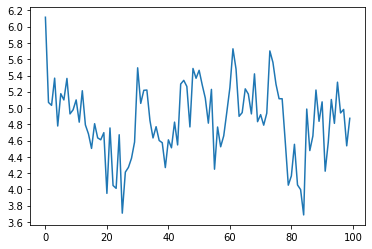

In [ ]:
# Training! ;) #
hidden_dim = 256
embedding_dim = 256
encoder1 = EncoderRNN(Vocab_EN, hidden_dim, embedding_dim).to(DEVICE)
attn_decoder1 = AttnDecoderRNN(hidden_dim, Vocab_FR.vocab_size, dropout_p=0.1).to(DEVICE)

trainIters(encoder1, attn_decoder1, 5000, print_every=50, plot_every=50)

## Analyze Attention Weights

- Choose one sample sentence, output attention weights for each token using heatmap
- Which pairs of the token have the greatest attention weight?

input = i m at a loss for words .
['i', 'm', 'at', 'a', 'loss', 'for', 'words', '.']
output = je vais une une a . . <eos>
input = education in this world disappoints me .
['education', 'in', 'this', 'world', 'disappoints', 'me', '.']
output = nous moi a a a a a . . <eos>


<ipython-input-348-624fab5ddc23>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + input_sentence.split(' ') +
<ipython-input-348-624fab5ddc23>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output_words)


input = i always liked mysterious characters more .
['i', 'always', 'liked', 'mysterious', 'characters', 'more', '.']
output = je ai ai a d . . <eos>
input = are you sure ?
['are', 'you', 'sure', '?']
output = que tu tu ? <eos>


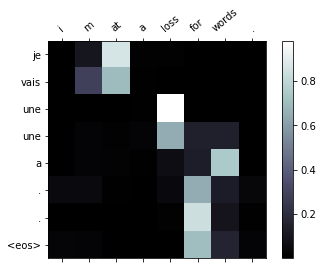

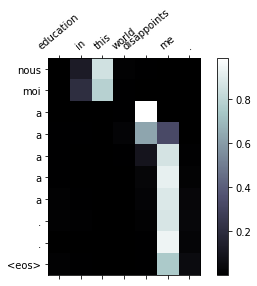

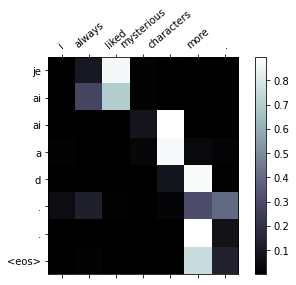

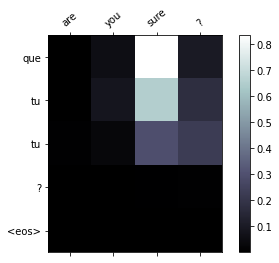

In [ ]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=40)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, Vocab_EN, Vocab_FR, input_sentence)
    print('input =', input_sentence)
    print(input_sentence.split(' '))
    print('output =', ' '.join(output_words))
    attentions = attentions[:len(output_words), :len(input_sentence.split(' '))]
    showAttention(input_sentence, output_words, attentions)

# Test: feel free to try more samples on your own #
evaluateAndShowAttention(train_pairs[10][0])

evaluateAndShowAttention(train_pairs[20][0])

evaluateAndShowAttention(train_pairs[30][0])

evaluateAndShowAttention(train_pairs[40][0])

In [ ]:
evaluateRandomly(encoder1, attn_decoder1)

> where s tom s office ?
= ou est le bureau de tom ?
< est est ce que il ? <eos>

> we can t be sure can we ?
= nous ne pouvons en etre certaines si ?
< pourquoi n pas pas le ? ? <eos>

> we have to save her .
= nous devons la sauver .
< tu devrais a a . . . <eos>

> you might at least say thank you . 
= tu devrais au moins dire merci .
< tu vous a a a . . <eos>

> i know you re telling the truth .
= je sais que tu dis la verite .
< je vous envie voir le . <eos>

> everyone recognized his skill .
= tout le monde a reconnu son talent .
< le avons s s il . <eos>

> he drank a bottle of wine .
= il a bu une bouteille de vin .
< il est est un un un . . <eos>

> what newspaper do you subscribe to ?
= a quel journal etes vous abonnee ?
< que tu tu tu d ? <eos>

> i hate when that happens .
= je deteste lorsque ca survient .
< je ai ai une . <eos>

> you can t possibly really believe that .
= vous ne pouvez pas croire cela quand meme .
< tu n pas pas a a . . <eos>



## Congrats! You can now train a simple machine translator by your own ;)